# Part I - (Exploration of Prosper Loan Data)
## by Abdulwasiu Bamidele Popoola

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> This data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit) explains the variables in the data set.
You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of theem.

The dataset can be downloaded from this [LINK](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1657791099475595&usg=AOvVaw0-TOnL_-tvEMcT7qa-sRiO)




## Preliminary Wrangling


To get started let us import the necessary libraries we shall ned for this exploration.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To begin we shall load in the dataset using the Pandas read_csv command.

In [379]:
# Load the dataset as a Pandas DataFrame

df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Check that the dataset loaded correctly by checking the dataFrame head
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


## General Overview of the Dataset

Using a function, we shall run code to have a general overview / feel of the dataset.

To achive this, we shall define some functions to enable ease of reuse.

##### General Overview 1

In [6]:
def general_overview_1(df):
    '''
    This function provides a genral overview od the DatFrame
    
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame info() and shape result.
    '''
    print("***" * 25)
    print("---General Overview of the Dataset---")
    print("***" * 25)
    display(df.info())
    print("***" * 25)
    print("---Shape of the Dataset---")
    print("***" * 25)
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("***" * 25)
  

In [7]:
general_overview_1(df) 

***************************************************************************
---General Overview of the Dataset---
***************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate            

None

***************************************************************************
---Shape of the Dataset---
***************************************************************************
The dataset has 113937 rows and 81 columns.
***************************************************************************


##### General Overview 2: Datatypes

In [483]:
def numerical_features(df):
    '''
    Provides information about the numerical (int64 and float64) 
    datatypes in the DataFrame.
    
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame features (columns) containing int64 and float64 datatypes.
    '''
    
    try:
        numerical_features = [features for features in df.columns if (df[features].dtypes == "int64") or (df[features].dtypes == "float64")]
        print(f"The  number of 'int64' and 'float64' (numerical) datatype features are: {len(numerical_features)}")
    except TypeError as err:
        print("The 'int64 and float64 (numerical)' datatype does not exist in the dataset")
    

In [9]:
def object_features(df):
    '''
    Provides information about the object datatypes in the DataFrame.
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame features (columns) containing object datatypes.
    '''
    
    try:
        object_features = [features for features in df.columns if df[features].dtypes == "object"]
        print(f"The  number of 'object' datatype features are: {len(object_features)}")
    except TypeError as err:
        print("The 'object' datatype does not exist in the dataset")


In [10]:
def boolean_features(df):
    '''
    Provides information about the bool datatypes in the DataFrame.
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame features (columns) containing boolean datatypes.
    '''
    
    try:    
        boolean_features = [features for features in df.columns if df[features].dtypes == "bool"]
        print(f"The  number of 'bool' datatype features are: {len(boolean_features)}")
    except TypeError as err:
        print("The 'bool' datatype does not exist in the dataset")


In [37]:
def categorical_features(df):
    '''
    Provides information about the category datatypes in the DataFrame.
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame features (columns) containing category datatypes.
    '''
    
    try:
        categorical_features = [features for features in df.columns if df[features].dtypes == 'category']
        print(f"The  number of 'category' datatype features are: {len(categorical_features)}")
    except TypeError as err:
        print("The 'category' datatype does not exist in the dataset")


In [43]:
def datetime_features(df):
    '''
    Provides information about the datetime64 datatypes in the DataFrame.
    Parameters
    ----------
    df = Pandas DataFrame name
    
    Returns
    -------
    Pandas DataFrame features (columns) containing datetime64 datatypes.
    '''
    
    try:
        datetime64_features = [features for features in df.columns if df[features].dtypes == "datetime64[ns]"]
        print(f"The  number of 'datetime64[ns]' datatype features are: {len(datetime64_features)}")
    except TypeError as err:
        print("The 'datetime64[ns]' datatype does not exist in the dataset.")


In [13]:
def timedelta_feature(df):
    '''
    Provides information about the timedelta[ns] datatypes in the DataFrame
    '''
    
    try:
        timedelta_features = [features for features in df.columns if df[features].dtypes == "timedelta[ns]"]
        print(f"The  number of timedelta[ns] datatype features are: {len(timedelta_features)}")
    except TypeError as err:
        print("The 'timedelta[ns]' datatype does not exist in the dataset")


In [44]:
def general_overview_datatypes(*args):
    '''
    Provides information about the ALL datatypes in the DataFrame.
    
    Parameters
    ---------
    Takes the following functions as arguments:
    
    numerical_features(df)
    object_features(df)
    boolean_features(df)
    category_features(df)
    datetime_features(df)
    timedelta_feature(df)
    
    Returns
    -------
    The total number of each datatype in the Pandas DataFrame.
    '''

In [45]:
general_overview_datatypes(numerical_features(df),
    object_features(df),
    boolean_features(df),
    categorical_features(df),
    datetime_features(df),
    timedelta_feature(df)
    )

The  number of 'int64' and 'float64' (numerical) datatype features are: 61
The  number of 'object' datatype features are: 17
The  number of 'bool' datatype features are: 3
The 'category' datatype does not exist in the dataset
The  number of 'datetime64[ns]' datatype features are: 0
The 'timedelta[ns]' datatype does not exist in the dataset


##### General Overview 3: Show dataset

In [19]:
def general_overview_show_dataset(df):
    '''Function provides a general overview of the dataset.
    
    Parameters
    ----------
    df: The Pandas DataFrame name
    
    Returns
    -------
    Displays the top 5, bottom 5 and random 5 rows of the dataset.
    
    '''
    print("***" * 25)
    print("-------------First five ROWS of the Dataset-------------\n")
    print("***" * 25)
    display(df.head(5))
    print("***" * 25)
    print("--------------Last five ROWS of the Dataset------------\n")
    print("***" * 25)
    display(df.tail(5))
    print("***" * 25)
    print("-------------Random sample five ROWS of the Dataset--------------\n")
    print("***" * 25)
    display(df.sample(5))
    print("***" * 25)
    


In [20]:
general_overview_show_dataset(df)

***************************************************************************
-------------First five ROWS of the Dataset-------------

***************************************************************************


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


***************************************************************************
--------------Last five ROWS of the Dataset------------

***************************************************************************


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


***************************************************************************
-------------Random sample five ROWS of the Dataset--------------

***************************************************************************


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
6127,9C3F3380631808380EC93C7,89419,2007-01-27 01:47:23.223000000,E,36,Completed,2007-08-15 00:00:00,0.20735,0.2000,0.1950,...,-27.46,0.0,0.0,0.0,0.0,1.0,0,0,0.0,222
27778,0171350250099114707CF5C,488981,2010-12-22 19:46:16.990000000,NaN,36,Completed,2012-07-20 00:00:00,0.33097,0.2950,0.2850,...,-88.46,0.0,0.0,0.0,0.0,1.0,0,0,0.0,120
14211,488F35305227400942A6E1A,537232,2011-11-03 18:42:02.377000000,NaN,36,Current,NaN,0.35132,0.3149,0.3049,...,-68.82,0.0,0.0,0.0,0.0,1.0,0,0,0.0,19
99940,70803550426716969740D60,600206,2012-06-15 10:37:48.823000000,NaN,36,Completed,2012-09-07 00:00:00,0.35797,0.3177,0.3077,...,-8.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,2
103734,80453578650899773D1E9E9,767110,2013-05-03 18:53:10.037000000,NaN,36,Current,NaN,0.27285,0.2346,0.2246,...,-26.51,0.0,0.0,0.0,0.0,1.0,0,0,0.0,74


***************************************************************************


##### General Overview 4: Duplicates and Missing values

In [21]:
def general_overview_2(df):
    '''Function provides a general overview of the dataset.
    Checks for duplicates and missing values in the dataset
    
    Parameters
    ----------
    df: The Pandas DataFrame name
    
    Returns
    ------
    Retruns the total number of missing and duplicate values in 
    columns and rows of the dataset
    '''
    
    print("***" * 25)
    print("---Number of duplicates---")
    print("***" * 25)
    print(f"The DataFrame has: {df.duplicated().sum()} duplicates.")
    print("***" * 25)
    print("---Total Number of missing values---")
    print("***" * 25)
    print(f"The total number of missing values in the DataFrame is: {df.isna().sum().sum()}.")
    print("***" * 25)
    print("---Number of COLUMNS with at least 1 missing value---")
    print("***" * 25)
    print(f"The total number of missing values in the DataFrame is: {(df.isna().sum(axis=0) != 0).sum()}")
    print("***" * 25)
    print("----Number of ROWS with at least 1 missing value---")
    print("***" * 25)
    print(f"The total number of missing values in the DataFrame is: {(df.isna().sum(axis=0) != 0).sum()}")
    print("***" * 25)

In [488]:
general_overview_2(df)

***************************************************************************
---Number of duplicates---
***************************************************************************
The DataFrame has: 0 duplicates.
***************************************************************************
---Total Number of missing values---
***************************************************************************
The total number of missing values in the DataFrame is: 1364086.
***************************************************************************
---Number of COLUMNS with at least 1 missing value---
***************************************************************************
The total number of missing values in the DataFrame is: 43
***************************************************************************
----Number of ROWS with at least 1 missing value---
***************************************************************************
The total number of missing values in the DataFrame is: 43
******

##### General Overview 5: Percentage Missing Values in the dataset

In [450]:
def percent_missing(df):
    '''Function gives the number and percentage of missing values per column.
    
    Parameters
    ----------
    df: Pandas DataFrame name
    
    Returns
    -------
    Displays the percentage of missing values per column.
    '''
    print("***" * 25)
    print("The total number of missing values of each feature per column in the dataset")
    print("***" * 25)
    display(df.isna().sum().sort_values(ascending=False))
    print("***" * 25)
    print("Percentages of missing values of each feature per column in the dataset")
    print("***" * 25)
    display(round((df.isna().sum() * 100 / len(df)), 2).sort_values(ascending = False))
    


In [489]:
with pd.option_context('display.max_rows', None):
    percent_missing(df)

***************************************************************************
The total number of missing values of each feature per column in the dataset
***************************************************************************


GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
CurrentCreditLines                

***************************************************************************
Percentages of missing values of each feature per column in the dataset
***************************************************************************


GroupKey                               88.29
LoanFirstDefaultedCycleNumber          85.12
ScorexChangeAtTimeOfListing            83.39
ProsperPrincipalOutstanding            80.62
ProsperPrincipalBorrowed               80.62
ProsperPaymentsOneMonthPlusLate        80.62
ProsperPaymentsLessThanOneMonthLate    80.62
OnTimeProsperPayments                  80.62
TotalProsperLoans                      80.62
TotalProsperPaymentsBilled             80.62
CreditGrade                            74.59
ClosedDate                             51.65
ProsperRating (Alpha)                  25.53
ProsperScore                           25.53
EstimatedReturn                        25.53
ProsperRating (numeric)                25.53
EstimatedLoss                          25.53
EstimatedEffectiveYield                25.53
DebtToIncomeRatio                       7.51
EmploymentStatusDuration                6.69
AmountDelinquent                        6.69
CurrentCreditLines                      6.67
BankcardUt

Since we wouldn't be using or analyzing all the variables, we will create a subset of the main dataset we shall be working on, using the loc method. This subset shall be called loans. going forward, we shall run our analysis on the loan DataFrame.

To achieve this, first I will identify and create a list of all the columns (called column_list) i will be using in this analysis.


In [490]:
column_list = ['CreditGrade', 'Term',\
        'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', \
        'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', \
       'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', \
       'IsBorrowerHomeowner', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', \
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',  \
       'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'AvailableBankcardCredit', \
       'TotalTrades', 'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio', 'IncomeRange', \
       'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'OnTimeProsperPayments', \
       'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'LoanCurrentDaysDelinquent', \
       'PercentFunded', 'Recommendations', 'Investors']

loans = df.loc[:, column_list]
loans.head(5)

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,PercentFunded,Recommendations,Investors
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,0,CO,...,True,3083.333333,NaN,NaN,NaN,NaN,0,1.0,0,258
1,NaN,36,Current,NaN,0.12016,0.0920,A,7.0,2,CO,...,True,6125.000000,NaN,NaN,NaN,NaN,0,1.0,0,1
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,0,GA,...,True,2083.333333,NaN,NaN,NaN,NaN,0,1.0,0,41
3,NaN,36,Current,NaN,0.12528,0.0974,A,9.0,16,GA,...,True,2875.000000,NaN,NaN,NaN,NaN,0,1.0,0,158
4,NaN,36,Current,NaN,0.24614,0.2085,D,4.0,2,MN,...,True,9583.333333,1.0,11.0,11000.0,9947.9,0,1.0,0,20


Now lets take a general overview of the new subset of the original dataset using the functions we defined ealier.

In [491]:
general_overview_1(loans)

***************************************************************************
---General Overview of the Dataset---
***************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         28953 non-null   object 
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          55089 non-null   object 
 4   BorrowerAPR                         113912 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   ProsperRating (Alpha)               84853 non-null   object 
 7   ProsperScore                        84853 non-null   float64
 8   ListingCategory (numeric)         

None

***************************************************************************
---Shape of the Dataset---
***************************************************************************
The dataset has 113937 rows and 38 columns.
***************************************************************************


In [492]:
general_overview_2(loans)

***************************************************************************
---Number of duplicates---
***************************************************************************
The DataFrame has: 0 duplicates.
***************************************************************************
---Total Number of missing values---
***************************************************************************
The total number of missing values in the DataFrame is: 646167.
***************************************************************************
---Number of COLUMNS with at least 1 missing value---
***************************************************************************
The total number of missing values in the DataFrame is: 25
***************************************************************************
----Number of ROWS with at least 1 missing value---
***************************************************************************
The total number of missing values in the DataFrame is: 25
*******

In [481]:
general_overview_show_dataset(loans)

***************************************************************************
-------------First five ROWS of the Dataset-------------

***************************************************************************


,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,PercentFunded,Recommendations,Investors
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,0,CO,...,True,3083.333333,NaN,NaN,NaN,NaN,0,1.0,0,258
1,NaN,36,Current,NaN,0.12016,0.0920,A,7.0,2,CO,...,True,6125.000000,NaN,NaN,NaN,NaN,0,1.0,0,1
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,0,GA,...,True,2083.333333,NaN,NaN,NaN,NaN,0,1.0,0,41
3,NaN,36,Current,NaN,0.12528,0.0974,A,9.0,16,GA,...,True,2875.000000,NaN,NaN,NaN,NaN,0,1.0,0,158
4,NaN,36,Current,NaN,0.24614,0.2085,D,4.0,2,MN,...,True,9583.333333,1.0,11.0,11000.0,9947.9,0,1.0,0,20


***************************************************************************
--------------Last five ROWS of the Dataset------------

***************************************************************************


,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,PercentFunded,Recommendations,Investors
113932,NaN,36,Current,NaN,0.22354,0.1864,C,5.0,1,IL,...,True,4333.333333,NaN,NaN,NaN,NaN,0,1.0,0,1
113933,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,A,8.0,7,PA,...,True,8041.666667,3.0,60.0,33501.0,4815.42,0,1.0,0,22
113934,NaN,60,Current,NaN,0.23984,0.2150,D,3.0,1,TX,...,True,2875.000000,NaN,NaN,NaN,NaN,0,1.0,0,119
113935,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,C,5.0,2,GA,...,True,3875.000000,1.0,16.0,5000.0,3264.37,0,1.0,0,274
113936,NaN,36,Current,NaN,0.13189,0.1039,A,7.0,1,NY,...,True,4583.333333,NaN,NaN,NaN,NaN,0,1.0,0,1


***************************************************************************
-------------Random sample five ROWS of the Dataset--------------

***************************************************************************


,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,PercentFunded,Recommendations,Investors
2660,NaN,60,Current,NaN,0.14453,0.1219,A,9.0,1,CA,...,True,4333.333333,1.0,35.0,7000.0,0.47,0,1.0000,0,185
7248,NaN,36,Current,NaN,0.09736,0.0839,AA,9.0,1,CA,...,True,1666.666667,NaN,NaN,NaN,NaN,0,1.0000,0,107
52728,NaN,36,Completed,2012-01-17 00:00:00,0.28675,0.2635,D,8.0,1,MA,...,True,7666.666667,NaN,NaN,NaN,NaN,0,1.0000,0,321
101550,NaN,36,Current,NaN,0.22872,0.1949,C,8.0,7,NY,...,True,6666.666667,NaN,NaN,NaN,NaN,0,0.8694,0,322
15959,NaN,36,Current,NaN,0.35356,0.3134,HR,4.0,1,IN,...,True,2973.000000,NaN,NaN,NaN,NaN,0,1.0000,0,1


***************************************************************************


In [493]:
general_overview_datatypes(numerical_features(loans),
    object_features(loans),
    boolean_features(loans),
    categorical_features(loans),
    datetime_features(loans),
    timedelta_feature(loans))

The  number of 'int64' and 'float64' (numerical) datatype features are: 26
The  number of 'object' datatype features are: 10
The  number of 'bool' datatype features are: 2
The 'category' datatype does not exist in the dataset
The  number of 'datetime64[ns]' datatype features are: 0
The 'timedelta[ns]' datatype does not exist in the dataset


In [494]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CreditGrade                         28953 non-null   object 
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          55089 non-null   object 
 4   BorrowerAPR                         113912 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   ProsperRating (Alpha)               84853 non-null   object 
 7   ProsperScore                        84853 non-null   float64
 8   ListingCategory (numeric)           113937 non-null  int64  
 9   BorrowerState                       108422 non-null  object 
 10  Occupation                          110349 non-null  object 
 11  EmploymentStatus          

In [474]:
percent_missing(loans)

***************************************************************************
The total number of missing values of each feature per column in the dataset
***************************************************************************


ProsperPrincipalOutstanding           91852
ProsperPrincipalBorrowed              91852
OnTimeProsperPayments                 91852
TotalProsperLoans                     91852
CreditGrade                           84984
ClosedDate                            58848
ProsperRating (Alpha)                 29084
ProsperScore                          29084
DebtToIncomeRatio                      8554
EmploymentStatusDuration               7625
AmountDelinquent                       7622
CurrentCreditLines                     7604
OpenCreditLines                        7604
TradesNeverDelinquent (percentage)     7544
TotalTrades                            7544
AvailableBankcardCredit                7544
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
TotalInquiries                         1159
CurrentDelinquencies                    697
FirstRecordedCreditLine                 697
CreditScoreRangeUpper           

***************************************************************************
Percentages of missing values of each feature per column in the dataset
***************************************************************************


ProsperPrincipalOutstanding           80.62
ProsperPrincipalBorrowed              80.62
OnTimeProsperPayments                 80.62
TotalProsperLoans                     80.62
CreditGrade                           74.59
ClosedDate                            51.65
ProsperRating (Alpha)                 25.53
ProsperScore                          25.53
DebtToIncomeRatio                      7.51
EmploymentStatusDuration               6.69
AmountDelinquent                       6.69
CurrentCreditLines                     6.67
OpenCreditLines                        6.67
TradesNeverDelinquent (percentage)     6.62
TotalTrades                            6.62
AvailableBankcardCredit                6.62
BorrowerState                          4.84
Occupation                             3.15
EmploymentStatus                       1.98
TotalInquiries                         1.02
CurrentDelinquencies                   0.61
FirstRecordedCreditLine                0.61
CreditScoreRangeUpper           

###### Define

Looking at the output of the info method and the documentation about Prosper Loans, we can see that we need to fix some of the datatypes in this dataset to reflect what it is meant to be.

I have identified some of these columns that need a change in datatype. Also some columns would be better off as int64 however I will leave them as float64 and just change the others.

I will create a list of the columns (called to_category) we need to change from object to category datatype and also another list (called to_datetime) of columns that we need to change to datetime datatype.


In [495]:
to_category = ['Term', 'ProsperRating (Alpha)', 'CreditGrade', 'LoanStatus', \
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', \
      'Occupation', 'EmploymentStatus']


to_datetime = ['ClosedDate', 'DateCreditPulled', \
        'FirstRecordedCreditLine']

##### Test
Next I will use the above lists in changing the datatypes.

In [496]:
# Pre-test

loans[to_category].dtypes

print("***" * 25)

loans[to_datetime].dtypes

Term                           int64
ProsperRating (Alpha)         object
CreditGrade                   object
LoanStatus                    object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
dtype: object

***************************************************************************


ClosedDate                 object
DateCreditPulled           object
FirstRecordedCreditLine    object
dtype: object

##### Code

In [497]:
# Converts to datatime datatype
loans[to_datetime] = loans[to_datetime].apply(pd.to_datetime)


# converts to category datatype
loans[to_category] = loans[to_category].astype("category")



In [498]:
# Post-test

loans[to_category].dtypes

print("***" * 25)

loans[to_datetime].dtypes

Term                         category
ProsperRating (Alpha)        category
CreditGrade                  category
LoanStatus                   category
ProsperScore                 category
ListingCategory (numeric)    category
BorrowerState                category
Occupation                   category
EmploymentStatus             category
dtype: object

***************************************************************************


ClosedDate                 datetime64[ns]
DateCreditPulled           datetime64[ns]
FirstRecordedCreditLine    datetime64[ns]
dtype: object

In [499]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CreditGrade                         28953 non-null   category      
 1   Term                                113937 non-null  category      
 2   LoanStatus                          113937 non-null  category      
 3   ClosedDate                          55089 non-null   datetime64[ns]
 4   BorrowerAPR                         113912 non-null  float64       
 5   BorrowerRate                        113937 non-null  float64       
 6   ProsperRating (Alpha)               84853 non-null   category      
 7   ProsperScore                        84853 non-null   category      
 8   ListingCategory (numeric)           113937 non-null  category      
 9   BorrowerState                       108422 non-null  category      
 10  Occupati

### What is the structure of your dataset?

The original dataset has 11393 observations and 81 features. For a complete description of the features (variables), refer to this [documemtation](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). Most variables in the original DataFrame are of the numeric datatype. The dataset has 50 variables of float64 datatype, 17 object, 11 int64 and 3 bool.

Our newly created subset DataFrame, `loans` we will be working with has 23 numeric, 3 datatime64[ns], 1 object, 2 bool, and 9 category datatypes.

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding:

- Which features will affect or determines a loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features may help support our investigation into the feature of interest (i.e. `LoanStatus`): I expect that most of the other features will have an effect on the feature of interest. Some of these features include: `Term`, `BorrowerAPR`, `BorrowerRate`, `rosperRating (Alpha)`, `ProsperScore`, `ListingCategory (numeric)`, `Occupation`, `EmploymentStatus`, `EmploymentStatusDuration`, `IsBorrowerHomeowner`, `CreditScoreRangeLower`, `CreditScoreRangeUpper`, `CurrentCreditLines`, `OpenCreditLines`, `IncomeVerifiable`, `TotalProsperLoans`, `Recommendations`, etc.

## Univariate Exploration

In this section, our main goal is to investigate distributions of individual variables (univariate). If we notice any unusual points or outliers, we shall take a deeper look to clean things up and prepare to look at relationships between variable in subsequernt sections.



Before we commence plotting each feature in the univariate visualization, let us take a general sneak peek of the visualization of our dataset.

### General Visualization Sneak Peek

<Figure size 432x288 with 0 Axes>

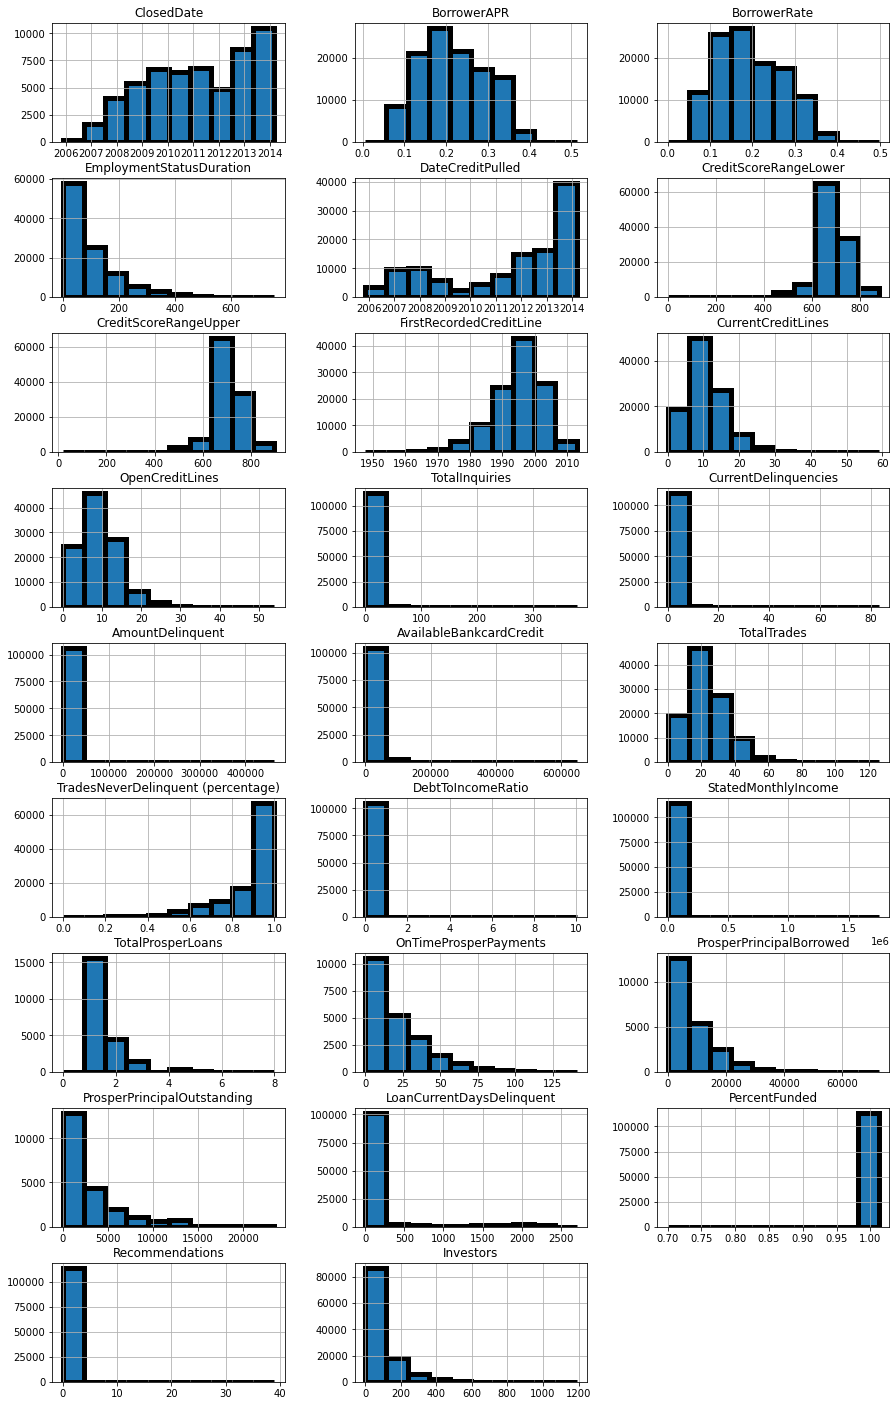

In [75]:
loans.hist(plt.tight_layout(), \
#            bins=25, \
#            xrot=90.0, \
           linewidth=5, \
           figsize=(15, 25), \
           layout=(-1, 3), \
           edgecolor="black");

### 1st Visualization: `LoanStatus` Dsitribution

**1st Question : What is the distribution of the variable of interest: `LoanStatus`?**

I will start by taking a look at the distribution of the feature of interest, `LoanStatus`.

In [160]:
loans.LoanStatus.value_counts(normalize=True)

Current                   0.496555
Completed                 0.334167
Chargedoff                0.105251
Defaulted                 0.044042
Past Due (1-15 days)      0.007074
Past Due (31-60 days)     0.003186
Past Due (61-90 days)     0.002747
Past Due (91-120 days)    0.002668
Past Due (16-30 days)     0.002326
FinalPaymentInProgress    0.001799
Past Due (>120 days)      0.000140
Cancelled                 0.000044
Name: LoanStatus, dtype: float64

From the result of the above cell output, our feature of interest, `LoanStatus` is a categorical variable with 12 main categories of borrowers. Howver the four highest are: `Current` making up about 49%of total borrowers, `Completed` constituting about 33%, `Chargedoff` makine up 10% and `Defaulted` making up about 4% of total borrowers by `LoanStatus`.

To begin, we shall first define a function which we shall use to plot all the univariate exploration visualizations.

In [501]:
def univariate_categorical_variable_countplot(df, column):
    '''Function that uses seaborn's countplot function 
    to plot visualizations in the categorical univariate exploration.
    
    Parameters
    ----------
    df = DataFrame name,
    column = DataFrame feature/column name.
    
    Returns
    ------
    A countplot of the univariate distribution.
    
    '''
    
    order = df[column].value_counts().index
    color = sns.color_palette()[9]
    fig = sns.countplot(y = column, data = df, color = color, order = order)
    return fig.set_title(f"Countplot showing Distribution of the feature: {column}")
    plt.show()
    


In [502]:
def univariate_categorical_variable_barplot(df, column):
    '''Function that uses matplotlib's barplot function 
    ricaal to plot visualizations in the categorical univariate exploration.
    
    Parameters
    ----------
    df = DataFrame name,
    column = DataFrame feature/column name.
    
    Return
    ------
    A barplot of the univariate distribution.
    
    '''
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(f"{column}")
    plt.ylabel("Counts")
    plt.title(f"Barplot showing Distribution of the feature: {column}")
    

**1st Visualization: `LoanStatus`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: LoanStatus')

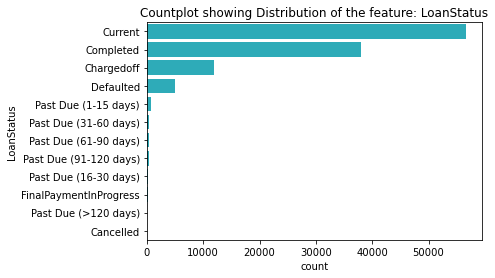

In [124]:
univariate_categorical_variable_countplot(loans, "LoanStatus")


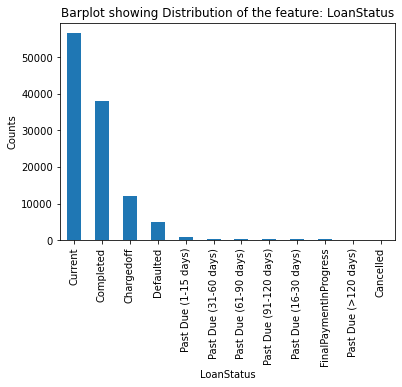

In [503]:
univariate_categorical_variable_barplot(loans, "LoanStatus")

**1st Observation**

The chart shows that majority have a Loan Status of `current` followed by `completed`, `chargedoff`, `defaulted` and `Past Due (1-15 days)` and then the rest.



**2nd Question: What is the distribution of the Risk Score: `ProsperScore`?**

Now lets explore other variables that may influence our variable of interest.

### 2nd Visualization: `ProsperScore` Dsitribution

**2nd Visualization: `ProsperScore`** 

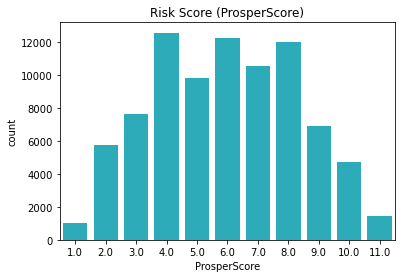

In [44]:
# order = loans.ProsperScore.value_counts().index
color = sns.color_palette()[9]
fig = sns.countplot(x = "ProsperScore", data = loans,  color = color)
fig.set_title("Risk Score (ProsperScore)")
plt.show();

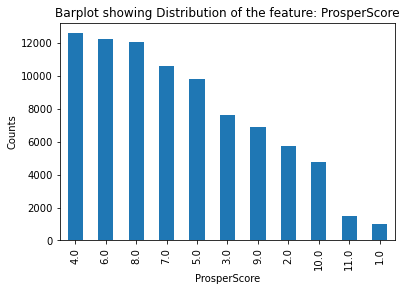

In [129]:
univariate_categorical_variable_barplot(loans, "ProsperScore")

**2nd Observation**

The `ProsperScore` is a custom risk score built using historical data. It ranges from 1 to 10 with 10 being the best or lowest risk score (therefore its an ordinal categorical data).

From the visualization shown above, we can see that majority had a risk score of 4, followed by 6, 8, 7, 5, 3, 9, 2 and 10 in that order. Few people had risk scores of 1, with an outlier of 11, which is outside the risk score grading system of 1-10.

**3rd Question: What is the distribution of Employment: `EmploymentStatus`?**

What is the employment status of the borrower at the time the listing was posted?

### 3rd Visualization: `Employment` Dsitribution

**3rd Visualization: `EmploymentStatus`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: EmploymentStatus')

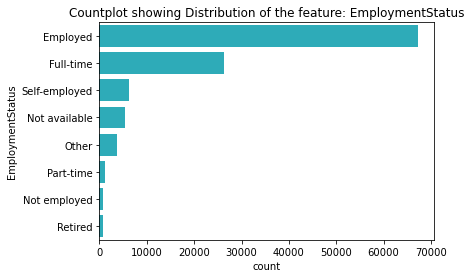

In [130]:
univariate_categorical_variable_countplot(loans, "EmploymentStatus")


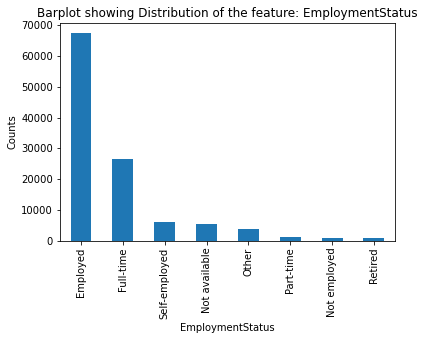

In [131]:
univariate_categorical_variable_barplot(loans, "EmploymentStatus")

**3rd Observation**

The visualization of the `EmploymentStatus` shows that majority of the borrowers are employed.

### 4th Visualization: `IsBorrowerHomeowner` Dsitribution

**4th Question: Is the borrower a home owner or have a mortgage on their credit profile?**

**4th Visualization: `IsBorrowerHomeowner`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: IsBorrowerHomeowner')

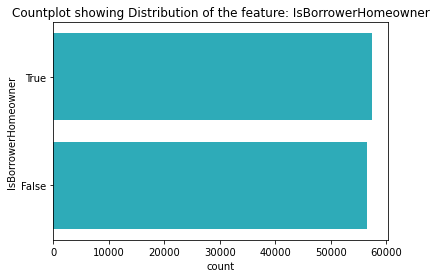

In [132]:
univariate_categorical_variable_countplot(loans, "IsBorrowerHomeowner")


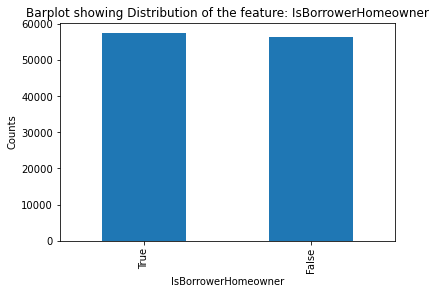

In [134]:
univariate_categorical_variable_barplot(loans, "IsBorrowerHomeowner")

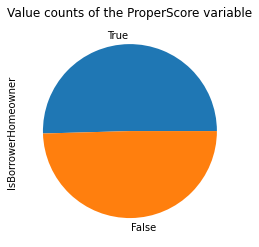

In [246]:
loans.IsBorrowerHomeowner.value_counts().plot(kind='pie');
plt.title("Value counts of the ProperScore variable");
plt.show();

**4th Observation**

The chart above shows that about equal numbers of borrowers have and don't have homes of their own.

### 5th Visualization: `CurrentDelinquencies` Dsitribution

**5th Question: What number of the borrowers accounts are delinquent at the time the credit was pulled?**

**5th Visualization: `CurrentDelinquencies`**

In [47]:
loans.CurrentDelinquencies.value_counts()

0.0     89742
1.0     11716
2.0      4357
3.0      2098
4.0      1379
5.0       916
6.0       690
7.0       517
8.0       397
9.0       289
10.0      212
11.0      191
12.0      147
13.0      111
15.0       83
14.0       71
16.0       58
17.0       40
18.0       37
21.0       31
19.0       28
20.0       27
22.0       21
24.0       12
27.0       12
23.0        9
26.0        8
31.0        6
32.0        5
28.0        5
25.0        5
35.0        2
30.0        2
36.0        2
41.0        2
64.0        1
33.0        1
59.0        1
50.0        1
57.0        1
39.0        1
45.0        1
83.0        1
82.0        1
37.0        1
40.0        1
51.0        1
Name: CurrentDelinquencies, dtype: int64

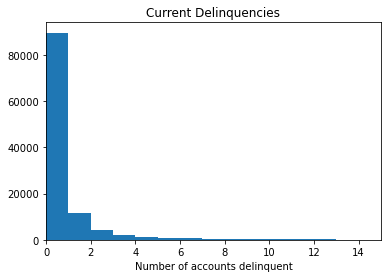

In [48]:
bins = np.arange(0, loans["CurrentDelinquencies"].max(), 1)
plt.hist(data = loans, x = "CurrentDelinquencies", bins = bins);
plt.xlabel("Number of accounts delinquent")
plt.title("Current Delinquencies")
plt.xlim(0, 15);
# plt.xticks(np.arange(0, 55, step=2))

**5th Observation**

The chart above shows that majority of the borrowers had between 0 and 1 delinquent accounts

### 6th Visualization: `AvailableBankcardCredit` Dsitribution

**6th Question: What is the distribution of the borrowers available bank credits?**



**6th Visualization: `AvailableBankcardCredit`**

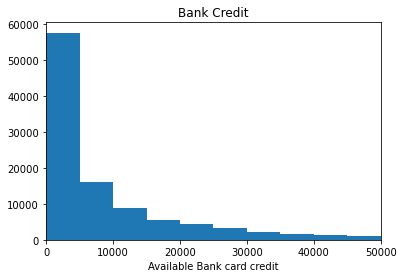

In [49]:
bins = np.arange(0, loans["AvailableBankcardCredit"].max(), 5000);
plt.hist(data = loans, x = "AvailableBankcardCredit", bins = bins);
plt.xlabel("Available Bank card credit")
plt.title("Bank Credit")
plt.xlim(0, 50000);

**6th Observation**

The above chart shows that most of the borrowers had available Bankcard credits of less than 5, 000.

### 7th Visualization: `IncomeRange` Dsitribution

**7th Question: What is the distribution of the Income Range of borrowers?** 

**7th Visualization: `IncomeRange`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: IncomeRange')

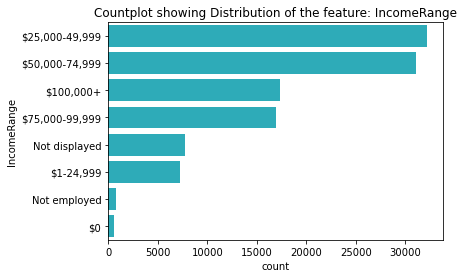

In [135]:
univariate_categorical_variable_countplot(loans, "IncomeRange")


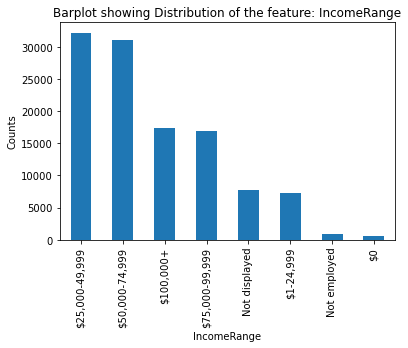

In [136]:
univariate_categorical_variable_barplot(loans, "IncomeRange")

**7th Observation**

The chart above shows that most borrowers fall within the income ranges of `$25,000 - 49,999` and `$50,000 - 74 999`.

### 8th Visualization: `Occupation` Distribution

**8th Question: What is the distribution of the borrowers by occupation?**

**8th Visualization: `Occupation`**

In [72]:
loans.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

The above cell output shows that the dataset has 67 unique occupations. For visualization clarity, we shall only plot the top 10 occupations and the bottom 10 occupations.

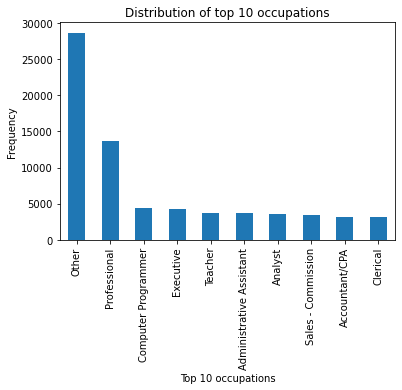

In [138]:
top_10_occupations = loans.Occupation.value_counts().head(10)

top_10_occupations.plot(kind= "bar", \
                        xlabel="Top 10 occupations", \
                        ylabel = "Frequency", \
                       title= "Distribution of top 10 occupations");


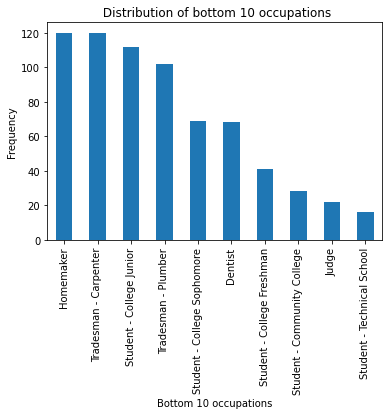

In [139]:
bottom_10_occupations = loans.Occupation.value_counts().tail(10)

bottom_10_occupations.plot(kind= "bar", \
                        xlabel="Bottom 10 occupations", \
                        ylabel = "Frequency", \
                          title = " Distribution of bottom 10 occupations");

**Observation 8**

From the output of the above charts, we can see that the most chosen occupation is `others` followed by `professional`.

Similarly, the least chosen occupation was `Student- Technical School`

### 9th Visualization: `BorrowerAPR` Distribution

**Question 9: What is the distribution of the `BorrowerAPR`**

**9th Visualization: `BorrowerAPR`**

In [141]:
loans.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

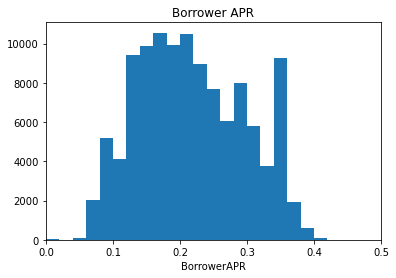

In [152]:
bins = np.arange(0, loans["BorrowerAPR"].max(), 0.02);
plt.hist(data = loans, x = "BorrowerAPR", bins = bins);
plt.xlabel("BorrowerAPR")
plt.title("Borrower APR")
plt.xlim(0, 0.5);

**9th Observation**

The `BorrowerAPR` seems to be normally distributed.

### 10th Visualization: `BorrowerRate` Distribution

**10th Question: What is the distribution of the `BorrowerRate` feature?**

**10th Visualization: `BorrowerRate`**

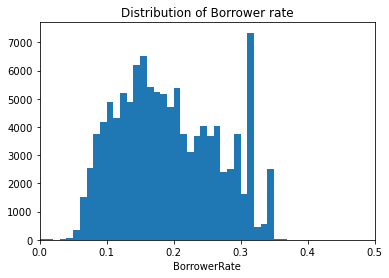

In [160]:
bins = np.arange(0, loans["BorrowerRate"].max(), 0.01);
plt.hist(data = loans, x = "BorrowerRate", bins = bins);
plt.xlabel("BorrowerRate")
plt.title("Distribution of Borrower rate")
plt.xlim(0, 0.5);

**10th Observation**

The `BorrowerRate` feature also appears to be normally distributed

### 11th Visualization: `Term` Distribution

**11th Question: What is the distribution of the `Term` feature?**

**11th Visualization: `Term`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: Term')

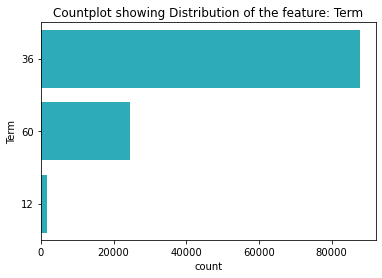

In [161]:
univariate_categorical_variable_countplot(loans, "Term")


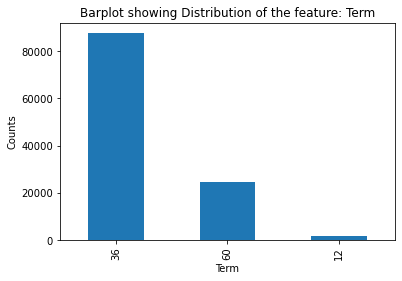

In [162]:
univariate_categorical_variable_barplot(loans, "Term")

**11th Observation**

The figures above indicate that most borrowers have a term of 36 months, followed by 60 months. Relatively ery few people have a term of 12 months

### 12th Visualization: `IncomeVerifiable` Distribution

**12th Question: What is the distribution of the `IncomeVerifiable` feature?**

**12th Visualization: `IncomeVerifiable`**

Text(0.5, 1.0, 'Countplot showing Distribution of the feature: IncomeVerifiable')

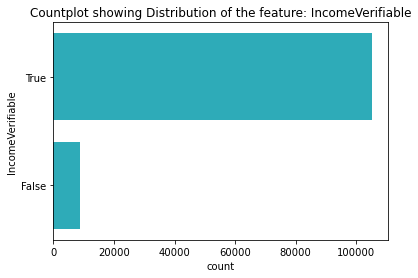

In [163]:
univariate_categorical_variable_countplot(loans, "IncomeVerifiable")


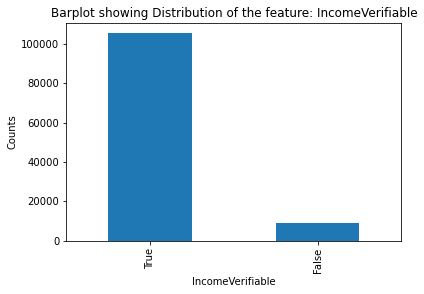

In [164]:
univariate_categorical_variable_barplot(loans, "IncomeVerifiable")

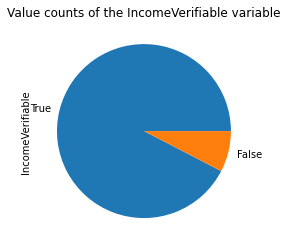

In [536]:
loans.IncomeVerifiable.value_counts().plot(kind='pie');
plt.title("Value counts of the IncomeVerifiable variable");
plt.show();

**12th Observation**

Majority of the  borrowers have a verifiable source of income.

### 13th Visualization: `AvailableBankcardCredit` Distribution

**13th VQuestion: What is the distribution of the `AvailableBankcardCredit` feature?**

**13th Visualization: `AvailableBankcardCredit`**

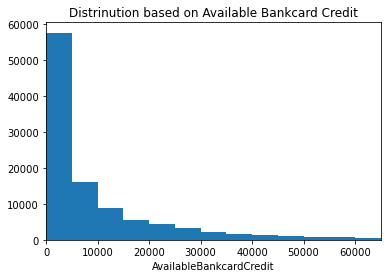

In [205]:
bins = np.arange(0, loans["AvailableBankcardCredit"].max(), 5000);
plt.hist(data = loans, x = "AvailableBankcardCredit", bins = bins);
plt.xlabel("AvailableBankcardCredit");
plt.title("Distrinution based on Available Bankcard Credit");
plt.xlim(0, 65000);

**13th Observation**

The distribution appears to be left skewed with majority of the values falling less than 10000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The `LoanStatus` of most borrowers is `current` making up about half of the entire borrowers. Also about 33% have a `completed` loan status, 10% had `Chargedoff` status and about 4% have `Defaulted`.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to select the main features by subsetting the main dataset for features I will using for this exploratory work. I had to set the order of charting for the nominal categorical variables but not for the ordinal variables. For some features, I also had to set the bin sizes (in some cases by using numpy arange function) in order to get a better view of the distribution of the variables. I also had to select some features from the entire dataset to narrow down my exploration on them.

The datatypes of some features was also changed to the appropriate datatype to enable proper exploration and visualization with the appropriate charts.

For some features with too many values, I focused on visualizing the top and bottom part of the observations.

## Bivariate Exploration

In this section, we shall dive deeper into investigating the relationships between pairs of variables in the data. We shall focus our exploration on some of the variables that we covered in the previous section (univariate exploration).

First, just like we did for the univariate exploration, let us plot a general bivariate plot view of the dataset as shown below.

## General Bivariate Distribution Sneak Preview

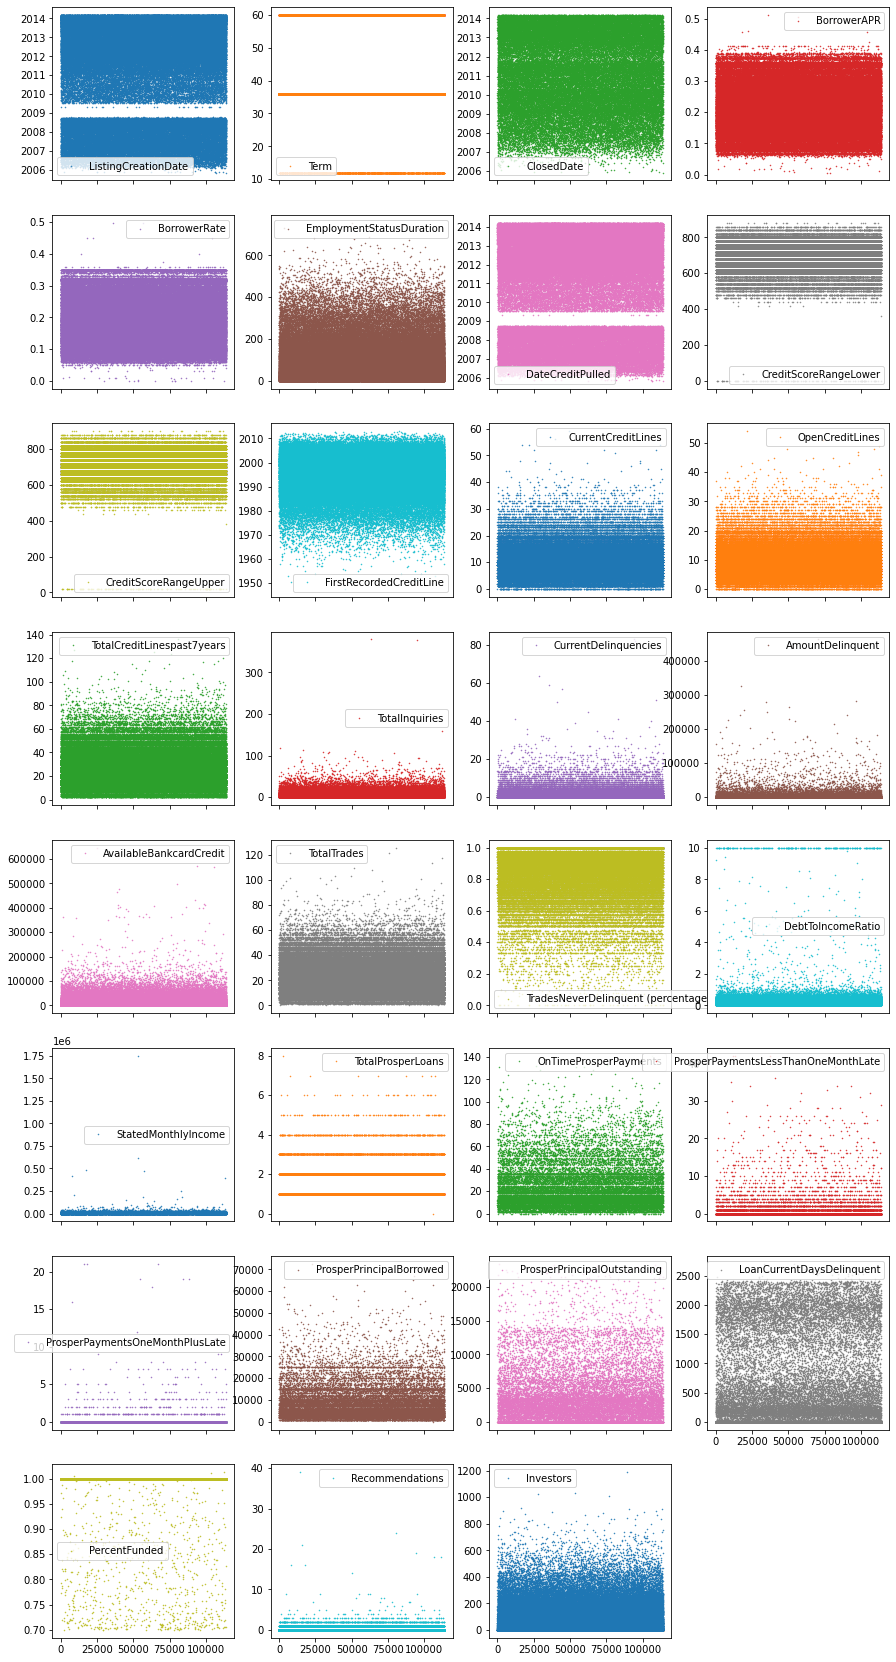

In [52]:
loans.plot(lw = 0, \
          marker = ".", \
          subplots = True, \
          layout = (-1, 4), \
          figsize = (15, 30), \
          markersize = 1);

### 14th Visualization: `LoanStatus` and `BorrowerAPR` Relationship

**14th Question: What is the relationship between `LoanStatus` and `BorrowerAPR`?**

**14th Visualization: `LoanStatus` vs `BorrowerAPR`**

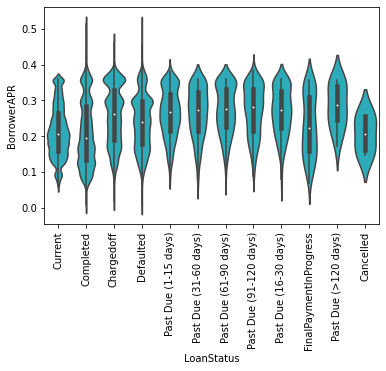

In [178]:
order = loans.LoanStatus.value_counts().index
color = sns.color_palette()[9]
sns.violinplot(data = loans, \
               x = "LoanStatus", \
               y = "BorrowerAPR", \
#                inner = None, \
              color = color, \
              order = order);
plt.xticks(rotation=90);

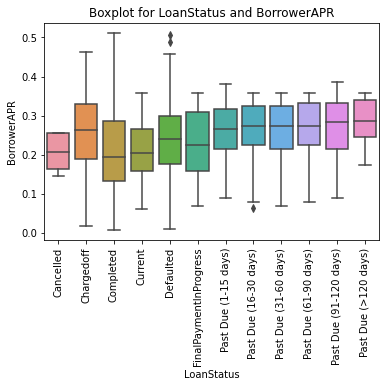

In [260]:
sns.boxplot(data = loans, \
               x = "LoanStatus", \
               y = "BorrowerAPR");
plt.title("Boxplot for LoanStatus and BorrowerAPR");
plt.xticks(rotation = 90);

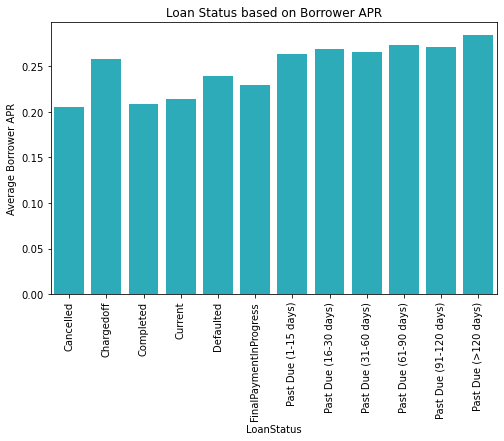

In [249]:
plt.figure(figsize=(8,5))
color = sns.color_palette()[9]
sns.barplot(x = "LoanStatus", y = "BorrowerAPR", data = loans, ci = None, color = color);
plt.title("Loan Status based on Borrower APR");
plt.xticks(rotation = 90);
plt.ylabel("Average Borrower APR");

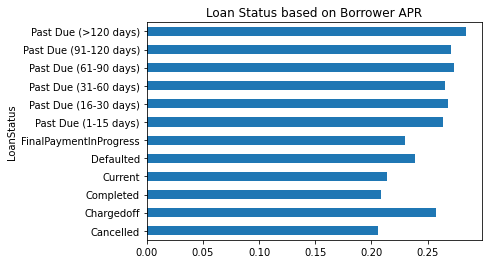

In [261]:
loans.groupby("LoanStatus").BorrowerAPR.mean().plot.barh(title = "Loan Status based on Borrower APR", \
                                                        xlabel = "Average Borrower APR");


**Observation**

The chart above shows that the median Annual Percentage Rate (APR) for the borrowers with `cancelled` status is about thesame with those with `completed` status. The plots also show that more of those borrowers who had statuses of `Chargedoff`, `defaulted`, `Past due` dates had a higher median APR. The shape of the `Current` LoanStatus indicates that the APR is largely concentarted around the median.

Similarly, those with `Current` Loan Status have one of the relatively lowest mean `BorrowerAPR`. Those who defaulted or were past their paymemt due dates had higher `BorrowerAPR`. Thus the `BorrowerAPR` can be seen to affect the `LoanStatus` of borrowers.

### 15th Visualization: `LoanStatus` and `BorrowerRate` Relationship

**15th Question: What is the relationship between `LoanStatus` and `BorrowerRate`?**

**15th Visualization: `LoanStatus` vs `BorrowerRate`**

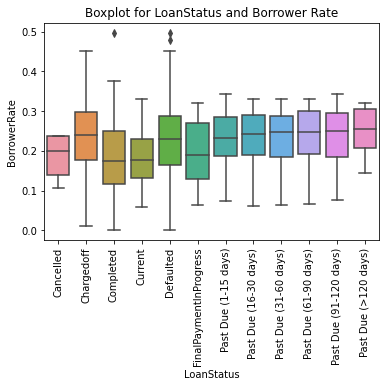

In [263]:
sns.boxplot(data = loans, \
               x = "LoanStatus", \
               y = "BorrowerRate");
plt.title("Boxplot for LoanStatus and Borrower Rate");
plt.xticks(rotation = 90);

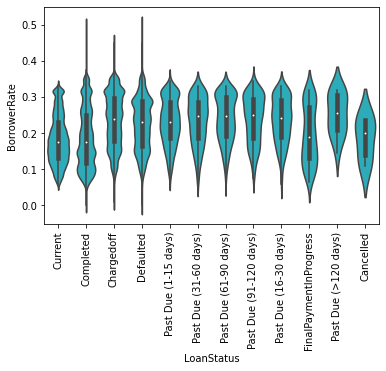

In [527]:
order = loans.LoanStatus.value_counts().index
color = sns.color_palette()[9]
sns.violinplot(data = loans, \
               x = "LoanStatus", \
               y = "BorrowerRate", \
#                inner = None, \
              color = color, \
              order = order);
plt.xticks(rotation=90);

<AxesSubplot:title={'center':'Loan Status based on Borrower Rate'}, xlabel='LoanStatus'>

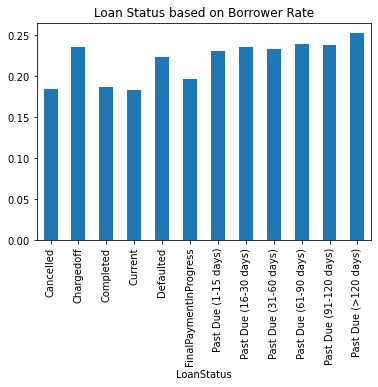

In [263]:
loans.groupby("LoanStatus").BorrowerRate.mean().plot.bar(title = "Loan Status based on Borrower Rate")

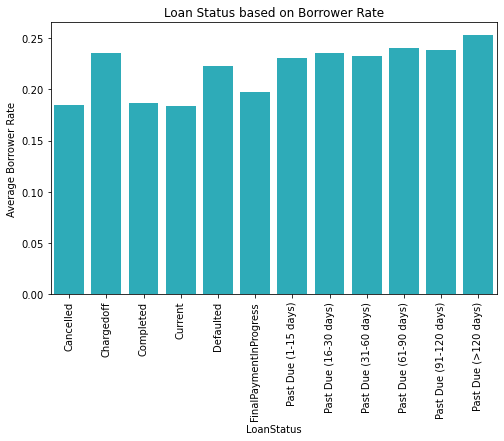

In [251]:
plt.figure(figsize=(8,5))
color = sns.color_palette()[9]
sns.barplot(x = "LoanStatus", y = "BorrowerRate", data = loans, ci = None, color = color);
plt.title("Loan Status based on Borrower Rate");
plt.xticks(rotation = 90);
plt.ylabel("Average Borrower Rate");

**15th Observation**

Borrowers with `Current` or `Completed` status have relatively lower `BorrowerRate` while those who defaulted or were past due dates had higher `BorrowerRate`.

### 16th Visualization: `LoanStatus` and `EmploymentStatusDuration` Relationship

**16th Question: What is the relationship between `LoanStatus` and `EmploymentStatusDuration`?**

**16th Visualization: `LoanStatus` Vs `EmploymentStatusDuration`**

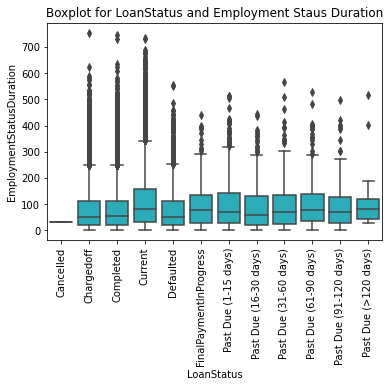

In [279]:
color = sns.color_palette()[9]

sns.boxplot(data = loans, \
               x = "LoanStatus", \
               y = "EmploymentStatusDuration", \
           color = color);
plt.title("Boxplot for LoanStatus and Employment Staus Duration");
plt.xticks(rotation = 90);

**16th Observation**

The borrowers with `Current` status had longer `EmploymentStatusDuration`. Those who defaulted or past due dates had relatively smaller `EmploymentStatusDuration`.

### 17th Visualization: `LoanStatus` and `AvailableBankcardCredit` Relationship

**17th Question: What is the relationship between `LoanStatus` and `AvilableBankcardCredit`?**

**17th Visualization: `LoanStatus` Vs `AvailableBankcardCredit`**

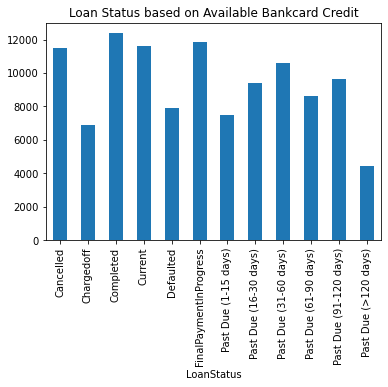

In [262]:
loans.groupby("LoanStatus").AvailableBankcardCredit.mean().plot.bar(title = "Loan Status based on Available Bankcard Credit");


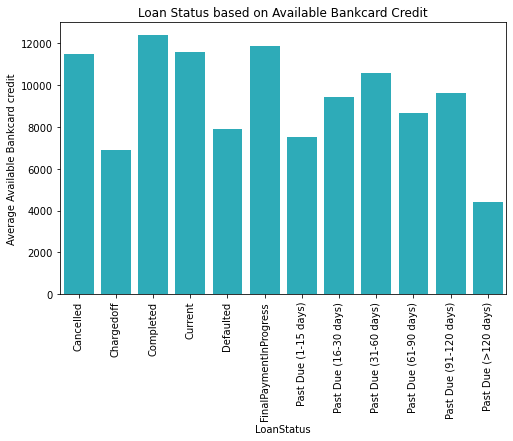

In [252]:
plt.figure(figsize=(8,5))
color = sns.color_palette()[9]
sns.barplot(x = "LoanStatus", y = "AvailableBankcardCredit", data = loans, ci = None, color = color);
plt.title("Loan Status based on Available Bankcard Credit");
plt.xticks(rotation = 90);
plt.ylabel("Average Available Bankcard credit");

**17th Observation**

Those borrowers with `Completed` or `Current` `LoanStatus` have higher `AvailableBankcardCredit`. Those borrowers with status of `Past Due (>120 days)` had the least `AvailableBankcardCredit`.

### 18th Visualization: `LoanStatus` and `IsBorrowerHomeowner` Relationship

**18th Question: What is the relationship between `LoanStatus` and `ISBorrowerHomeowner`?**

**18th Visualization: `LoanStatus` Vs `IsBorrowerHomeowner`**

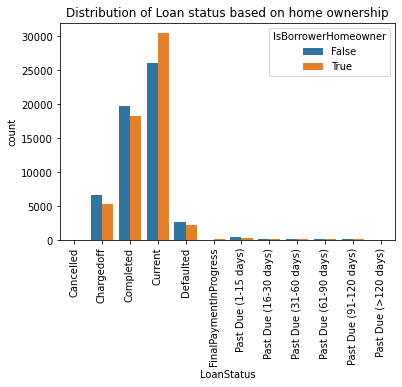

In [253]:
sns.countplot(data = loans, x = "LoanStatus", hue = "IsBorrowerHomeowner")
plt.xticks(rotation = 90);
plt.title("Distribution of Loan status based on home ownership");


**18th Obervation**

Amongst borrowers, a larger number of those with homes have `Current` loan status. Even amongst thesame category of borrowers, the highest number have no homes. This is closely followed by the borrowers with `Completed` status

### 19th Visualization: `LoanStatus` and `Term` Relationship

**19th Question: What is the relationship between `LoanStatus` and `Term`?**

**19th Visualization: `LoanStatus` vs `Term`**

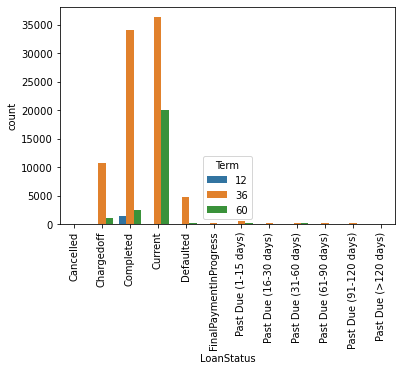

<Figure size 1008x576 with 0 Axes>

In [505]:
sns.countplot(data = loans, x = "LoanStatus", hue = "Term")
plt.xticks(rotation = 90);
plt.figure(figsize=(14, 8));


**19th Observation**

Amongst all categories of `LoanStatus`, the commonest loan `Term` is 36 months, and particularly, amongst those borrowers with `Completed` and `Current` loan statuses. Amongst `Current` loan status borrowers, 60 months `Term` is the 2nd commnest.

### 20th Visualization: `BorrowerAPR` and `BorrowerRate` Relationship

**20th Question: What is the relationship between `BorrowerAPR` and `BorrowerRate`?**

**20th Visualization: `BorrowerAPR` Vs `BorrowerRate`**

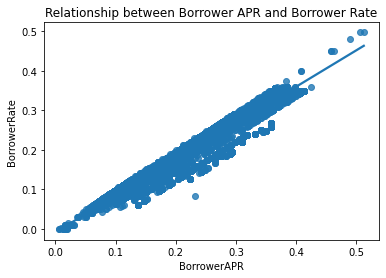

In [290]:
sns.regplot(data = loans, x = "BorrowerAPR", y = "BorrowerRate");
plt.title("Relationship between Borrower APR and Borrower Rate");

**20th Observation**

There is a positve correlation between the `BorrowerAPR` and `BorrowerRate`.

### 21st Visualization: `Term` and `BorrowerRate` Relationship

**21st Question: What is the relationship between loan `Term` and `BorrowerRate`?**

**21st Visualization: `Term` Vs `BorrowerRate`**

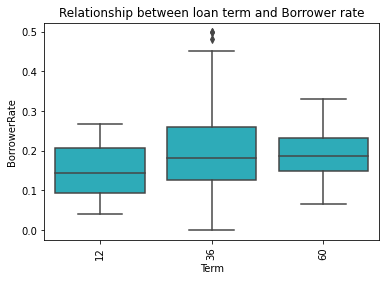

In [285]:
color = sns.color_palette()[9]

sns.boxplot(data = loans, \
            x = "Term", \
            y = "BorrowerRate", \
            color = color);
plt.xticks(rotation = 90);
plt.title("Relationship between loan term and Borrower rate");

**21st Observation**

The 12 months loan term had the lowest median `Borrowerrate` while both the 36 and 60 months terms had about thesame median `Borrowerrate`.

The 36 months term had the highest `BorrowerRate` with some even shown as outliers. It also had the lowest rate amongst the three terms.

### 22nd Visualization: `BorrowerRate` and `IsBorrowerHomeowner` Relationship

**22nd Question: What is the relationship between `BorrowerRat` and `IsBorrowerHomeowner`?**

**22nd Visualization: `BorrowerRate` vs `IsBorrowerHomeowner`**

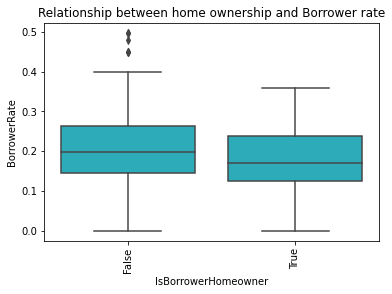

In [289]:
color = sns.color_palette()[9]

sns.boxplot(data = loans, \
            x = "IsBorrowerHomeowner", \
            y = "BorrowerRate", \
            color = color);
plt.xticks(rotation = 90);
plt.title("Relationship between home ownership and Borrower rate");

**22nd Observation**

Those borrowers without homes had a higher `BorrowerRrate`.

### 23rd Visualization: `BorrowerRate` and `IncomeRange` Relationship

**23rd Question: What is the relationship between `BorrowerRate` and `IncomeRange`?**

**23rd Visualization: `IncomeRange` vs `BorrowerRate`**

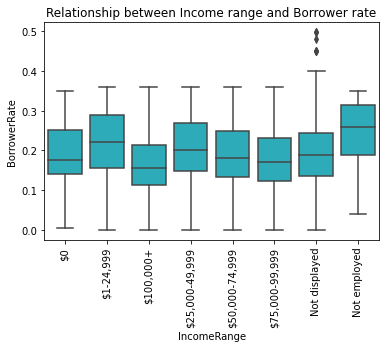

In [284]:
color = sns.color_palette()[9]

sns.boxplot(data = loans, \
            x = "IncomeRange", \
            y = "BorrowerRate", \
            color = color);
plt.xticks(rotation = 90);
plt.title("Relationship between Income range and Borrower rate");

**23rd Observation**

Those with 0 dollars asincome range had about thesame minimum nad maximum values of `BorrowerRate` as the other `IncomeRange` categories.

There doesn't appear to be much significant differences in minimum and maximum income rates between the categories of income. Infact those `Not employed` had a relatively higher minimum value of `BorrowerRate`

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Those borrowers with `LoanStatus` of `Current` and `Completed` had the lowest `BorrowerAPR` and `BorrowerRate`.

Borrowers with loan status of `Current` had longer `EmploymentStatusDuration`.
In addition, borrowers with loan statuses of `Completed` or `Current` had higher `AvailableBankcardCredit`.

Amongst borrowers, a larger number of those with homes have `Current` loan status. Even amongst thesame category of borrowers, the highest number have no homes.

Amongst all categories of `LoanStatus`, the commonest loan Term is *36 months*, and particularly, amongst those borrowers with `Completed` and `Current` loan statuses.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a positve correlation between the `BorrowerAPR` and `BorrowerRate`.
The 36 months `Term` had the highest `BorrowerRate` with some even shown as outliers. It also had the lowest `BorrowerRate` amongst the three terms.

Those borrowers without homes had a higher `BorrowerRrate`.

Those with 0 dollars as income range had about thesame minimum nad maximum values of `BorrowerRate` as the other `IncomeRange` categories.

There doesn't appear to be much significant differences in minimum and maximum income rates between the categories of income. Infact those `Not employed` had a relatively higher minimum value of `BorrowerRate`

---

## Multivariate Exploration

In this section we shall further expand on our exploration of the dataset from the previous sections of univariate and bivariate explorations by creating plots of three or more variables(multivariate) to investigate our Prosper Loan data even further. We sha;; therefore be buildoing up from
our exploration work in the previous sections.

### 24th Visualization: `LoanStatus`,  `BorrowerAPR`, and `IsBorrowerHomeowner`  Relationship

**24th Question: What is the relationship between `LoanStatus`, `BorrowerAPR` and `IsBorrowerHomeowner`?**

**24th Visualization: `LoanStatus`, vs `BorrowerAPR` vs`IsBorrowerHomeowner`**

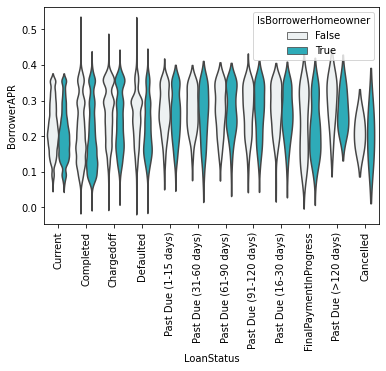

<Figure size 3240x2520 with 0 Axes>

In [296]:
order = loans.LoanStatus.value_counts().index
color = sns.color_palette()[9]
sns.violinplot(data = loans, \
               x = "LoanStatus", \
               y = "BorrowerAPR", \
               inner = None, \
               hue = "IsBorrowerHomeowner", \
              color = color, \
              order = order);
plt.xticks(rotation=90);
plt.figure(figsize = (45, 35));


**24th Observation**


Amongst those borrowers with `Current` Loan status, there doesn't appear to be any difference in `BorrowerRates` between those with homes and those without homes.

The `BorrowerRate` was highest amongst those who have `Defaulted` and `Completed` loan statuses. However, amongst the former group, those who didn't have homes had comparatively higher `BorrowerRate`.


### 25th Visualization: `Term`,  `BorrowerRate`, and `IsBorrowerHomeowner`  Relationship

**25th Question: What is the relationship between `Term`, `BorrowerRate` and `IsBorrowerHomeowner`?**

**25th Visualization: `Term`vs `BorrowerRate` vs `IsBorrowerHomeowner`**

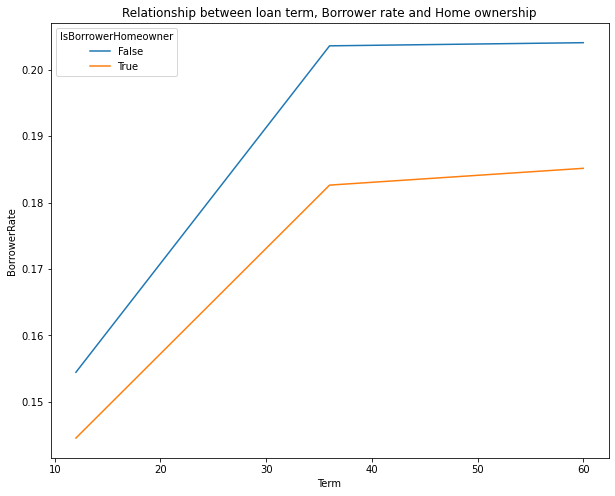

In [438]:
plt.figure(figsize=(10,8));
sns.lineplot(data = loans, \
             x = "Term", \
             y = "BorrowerRate", \
             ci = None, \
             hue = "IsBorrowerHomeowner");
plt.title("Relationship between loan term, Borrower rate and Home ownership");

**25th Observation**

Borrowers without homes have a higher `BorrowerRate` for thesame loan `Term`.

### 26th Visualization: `Term`,  `BorrowerAPR`, and `IsBorrowerHomeowner`  Relationship

**26th Question: What is the relationship between `Term`, `BorrowerAPR` and `IsBorrowerHomeowner`?**

**25th Visualization: `Term`, vs `BorrowerAPR` vs `IsBorrowerHomeowner`**

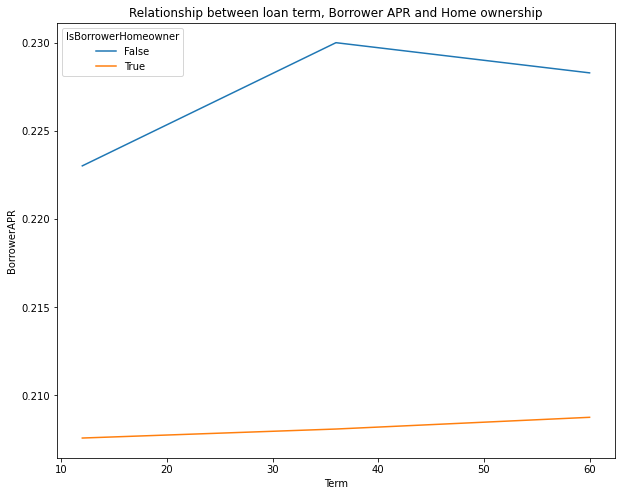

In [439]:
plt.figure(figsize=(10,8));
sns.lineplot(data = loans, \
             x = "Term", \
             y = "BorrowerAPR", \
             ci = None, \
             hue = "IsBorrowerHomeowner");
plt.title("Relationship between loan term, Borrower APR and Home ownership");

**26th Observation**

Again those without homes have higher `BorrowerAPR` relative to those with homes, for all loan terms. Amongst the latter group, there doesn't appear to be much difference in `BorrowerAPR` based on the terms of loan. Amongst the former group, the 36 months loan term has the highest `BorrowerAPR`.

### 27th Visualization: `Term`,  `BorrowerAPR`, and `LoanStatus`  Relationship

**27th Question: What is the relationship between `Term`, `BorrowerAPR` and `LoanStatus`?**

**27th Visualization: `Term` vs `BorrowerAPR` vs `LoanStatus`**

For this we shall first create a list of categories we wish to plot. This is in order to ensure our visualization is easy to read and understand because plotting all the categories will result in too much noise. We sall focus on the top five categories as shown below.

In addition we create a color dictionary which we shall assign to our categories. We can use the inbuilt color palette for Matplotlib, but I prefer to define my own for better control and ease of visualization interpretation.

In [400]:
loan_status_categories = ['Defaulted', \
                          'Cancelled', \
                          'Chargedoff', \
                          'Completed', \
                          'Current']

Next we use the Pandas query method to subset for thse categories as shown in the code cell below. Notice that the final value_counts of the column returns zero for those categories we aren not interesred in plotting.

In [398]:
df1 = loans.query('LoanStatus in @loan_status_categories')

df1.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Cancelled                     5
FinalPaymentInProgress        0
Past Due (1-15 days)          0
Past Due (16-30 days)         0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (>120 days)          0
Name: LoanStatus, dtype: int64

---

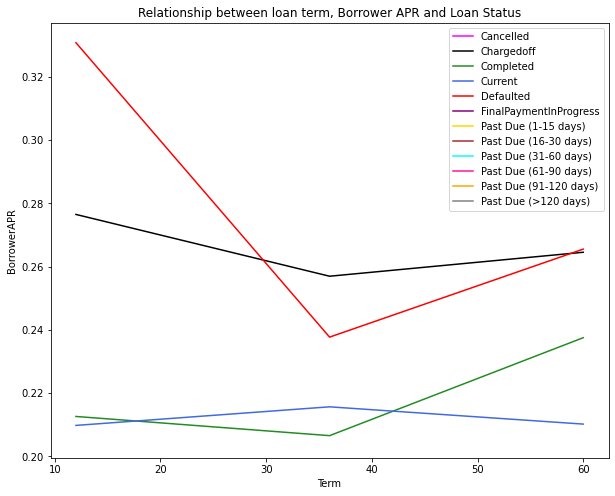

In [429]:
color = {"Defaulted": "red", "Completed": "forestgreen", \
        "Current": "royalblue", "Chargedoff": "black", \
        "Cancelled": "magenta", "FinalPaymentInProgress": "purple",\
        "Past Due (1-15 days)": "gold", "Past Due (16-30 days)": "brown", \
        "Past Due (31-60 days)": "cyan", "Past Due (61-90 days)": "deeppink", \
        "Past Due (91-120 days)": "orange", "Past Due (>120 days)": "grey"}
plt.figure(figsize=(10,8))
sns.lineplot(data = df1, \
             x = "Term", \
             y = "BorrowerAPR", \
             ci = None, \
             hue = "LoanStatus", \
            palette = color);
plt.title("Relationship between loan term, Borrower APR and Loan Status");
plt.legend();

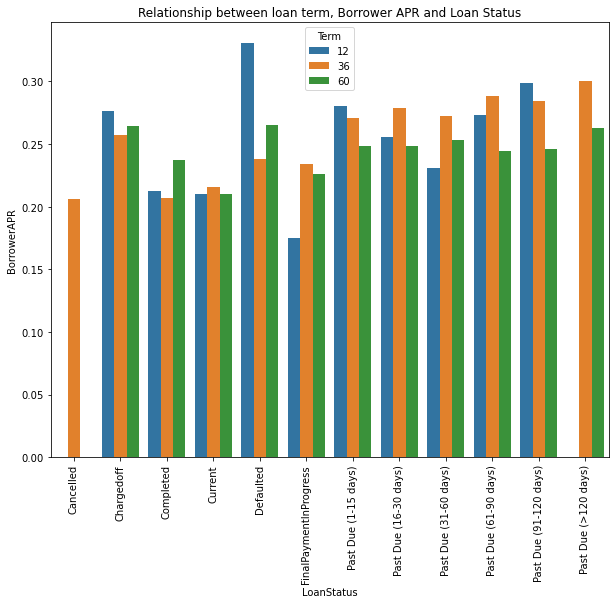

In [445]:
plt.figure(figsize=(10,8));
sns.barplot(data = loans, \
            ci = None, \
            x = "LoanStatus", \
            hue = "Term", \
            y = "BorrowerAPR");
plt.xticks(rotation = 90);
plt.title("Relationship between loan term, Borrower APR and Loan Status");

**27th Observation**

Those with `Term` of 12 months and `LoanStatus` of `Defaulted` had the highest `BorrowerAPR`.

### 28th Visualization: `term`,  `BorrowerRate`, and `LoanStatus`  Relationship

**28th Question: What is the relationship between `Term`, `BorrowerRate` and `LoanStatus`?**

**28th Visualization: `Term` vs `BorrowerRate` vs `LoanStatus`**

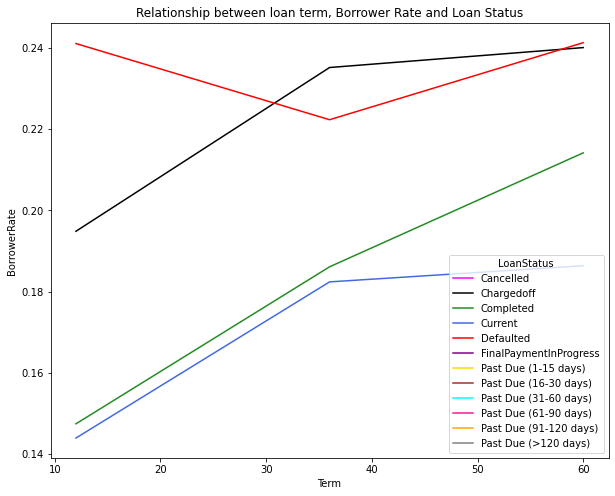

In [427]:
color = {"Defaulted": "red", "Completed": "forestgreen", \
        "Current": "royalblue", "Chargedoff": "black", \
        "Cancelled": "magenta", "FinalPaymentInProgress": "purple",\
        "Past Due (1-15 days)": "gold", "Past Due (16-30 days)": "brown", \
        "Past Due (31-60 days)": "cyan", "Past Due (61-90 days)": "deeppink", \
        "Past Due (91-120 days)": "orange", "Past Due (>120 days)": "grey"}

plt.figure(figsize=(10,8))
sns.lineplot(data = df1, \
             x = "Term", \
             y = "BorrowerRate", \
             ci = None, \
             palette = color, \
             hue = "LoanStatus");
plt.title("Relationship between loan term, Borrower Rate and Loan Status");

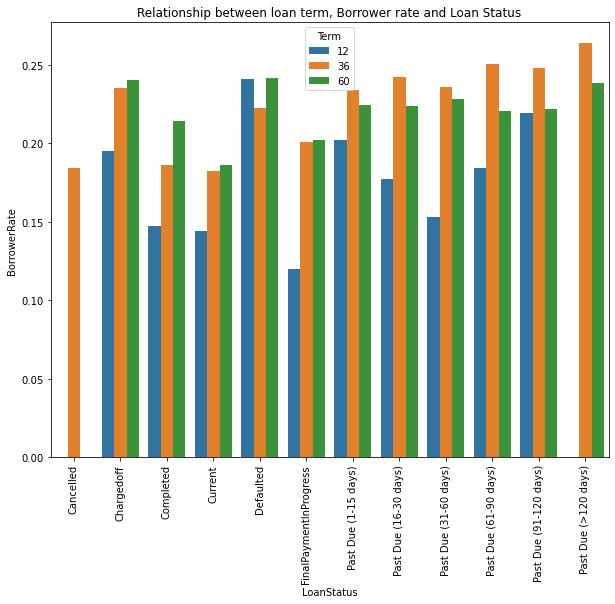

In [444]:
plt.figure(figsize=(10,8));
sns.barplot(data = loans, \
            ci = None, \
            x = "LoanStatus", \
            hue = "Term", \
            y = "BorrowerRate");
plt.xticks(rotation = 90);
plt.title("Relationship between loan term, Borrower rate and Loan Status");

**28th Observation**

Those with `Defaulted` status had the highest `BorrowerRate` for those with `Term` of 12 months.

For `Term` of 12 months, those who had the lowest `BorrowerRate` were those with `LoanStatus` of `FinalPaymentInProgress`.

There is a progressive increase in `LoanRate` for those with statuses of `Chargedoff`, `Completed`, and `Current` with increasing loan `Term`. Amongst the `Defaulted` group, there doesn't appear to be much difference in `BorrowerRate` across the three loan `Term`s.

`Borrowerrates` appear to be higher for `LoanStatus`es of `Defaulted` onwards across all `Term`s.

---

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The `BorrowerRate` was highest amongst those who have `Defaulted` and `Completed` loan statuses. However, amongst the former group, those who didn't have homes had comparatively higher `BorrowerRate`.


For `Term` of 12 months, those who had the lowest `BorrowerRate` were those with `LoanStatus` of `FinalPaymentInProgress`.

There is a progressive increase in `LoanRate` for those with statuses of `Chargedoff`, `Completed`, and `Current` with increasing loan `Term`. Amongst the `Defaulted` group, there doesn't appear to be much difference in `BorrowerRate` across the three loan `Term`s.

`BorrowerRates` appear to be higher for `LoanStatus`es of `Defaulted` onwards across all `Term`s.



### Were there any interesting or surprising interactions between features?

Borrowers without homes have a higher `BorrowerRate` for thesame loan `Term`. In addition, those without homes have higher `BorrowerAPR` relative to those with homes, for all loan terms. 

## Conclusions
This exploration just tried to touch on some parts. Its far from being exhaustive and there is still room for firther exploration. However, some conclusions I could make from this exploration include the following.

A borrowers `LoanStatus` is affected by the `BorrowerAPr`, `BorrowerRate`, `EmploymentStatusDuration` etc.

There is a positve correlation between the `BorrowerAPR` and `BorrowerRate`.

The borrowers with `Current` loan status had longer `EmploymentStatusDuration`. Those who defaulted or past due dates had relatively smaller `EmploymentStatusDuration`.

Borrowers with `Current` or `Completed` loan status have relatively lower `BorrowerRate` while those who defaulted or were past due dates had higher `BorrowerRate`.

The `BorrowerRate` was highest amongst those who have `Defaulted`.

Most loans were for a `Term` of 36 months.
